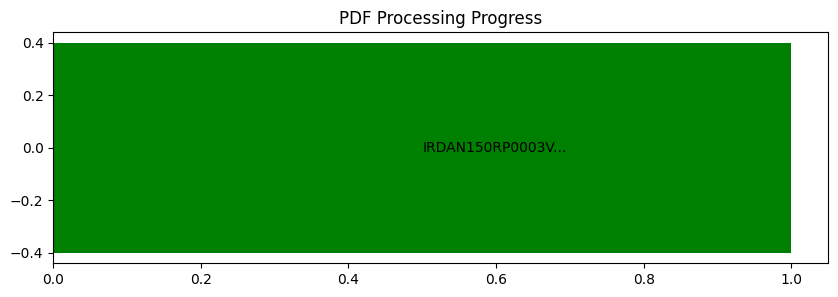

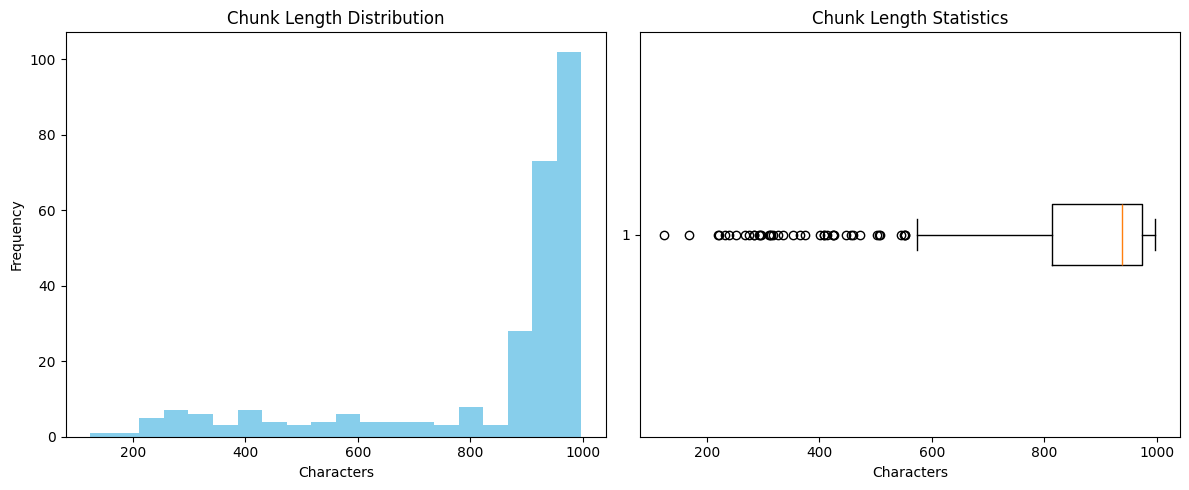

✅ Processed 84 pages → 276 chunks
📊 Chunk length stats: Avg=838 chars


In [1]:
# %% [markdown]
# # Document Processing
# ![Chunk Distribution](visuals/chunk_distribution.png)

# %%
import os
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import numpy as np

# %%
def load_and_split_pdfs(pdf_dir):
    """Process PDFs with progress visualization"""
    documents = []
    pdf_dir = Path(pdf_dir)
    
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.set_title("PDF Processing Progress")
    
    for i, pdf_file in enumerate(pdf_dir.glob("*.pdf")):
        try:
            loader = PyPDFLoader(str(pdf_file))
            docs = loader.load()
            documents.extend(docs)
            ax.barh([0], [i+1], color='green')
            ax.text(i+0.5, 0, f"{pdf_file.name[:15]}...", va='center')
            display(fig)
            plt.close()
        except Exception as e:
            print(f"Error processing {pdf_file}: {e}")
    
    if not documents:
        raise ValueError("No valid PDFs found")
    
    return documents

# %%
def visualize_chunks(documents):
    """Generate chunk visualization"""
    chunk_lens = [len(doc.page_content) for doc in documents]
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(chunk_lens, bins=20, color='skyblue')
    plt.title("Chunk Length Distribution")
    plt.xlabel("Characters")
    plt.ylabel("Frequency")
    
    plt.subplot(1, 2, 2)
    plt.boxplot(chunk_lens, vert=False)
    plt.title("Chunk Length Statistics")
    plt.xlabel("Characters")
    
    plt.tight_layout()
    plt.savefig("visuals/chunk_distribution.png", dpi=150)
    plt.show()

# %%
# Main Execution
if __name__ == "__main__":
    try:
        documents = load_and_split_pdfs("../knowledge_base")
        
        splitter = RecursiveCharacterTextSplitter(
            chunk_size=1000,
            chunk_overlap=200
        )
        chunks = splitter.split_documents(documents)
        
        visualize_chunks(chunks)
        
        with open("../processed_data/chunks.pkl", "wb") as f:
            pickle.dump(chunks, f)
            
        print(f"✅ Processed {len(documents)} pages → {len(chunks)} chunks")
        print(f"📊 Chunk length stats: Avg={np.mean([len(c.page_content) for c in chunks]):.0f} chars")
        
    except Exception as e:
        print(f"❌ Error: {e}")